<Axes: >

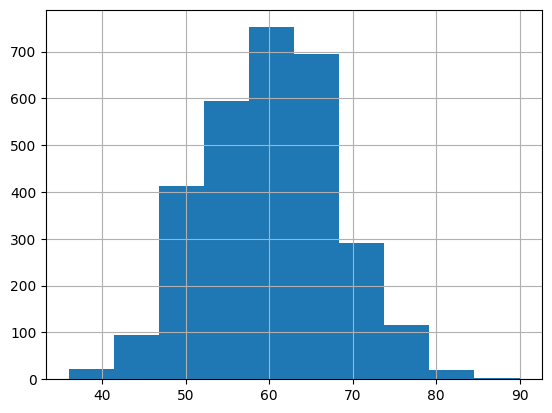

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson

np.random.seed(1234)
# represents 3000 people who take about a 60 minute break
long_breaks = stats.poisson.rvs(mu=60, size=3000)
pd.Series(long_breaks).hist()


<Axes: >

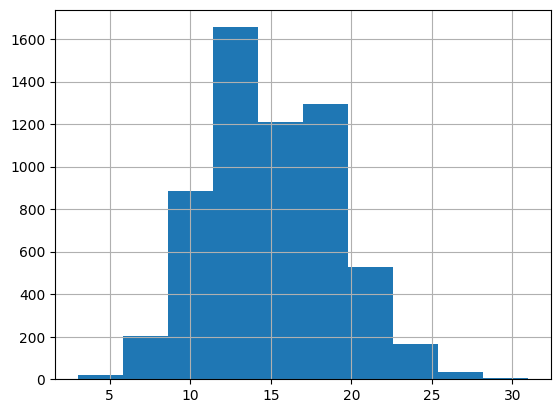

In [12]:
# represents 6000 people who take about a 15 minute break
short_breaks = stats.poisson.rvs(mu=15, size=6000)
pd.Series(short_breaks).hist()

<Axes: >

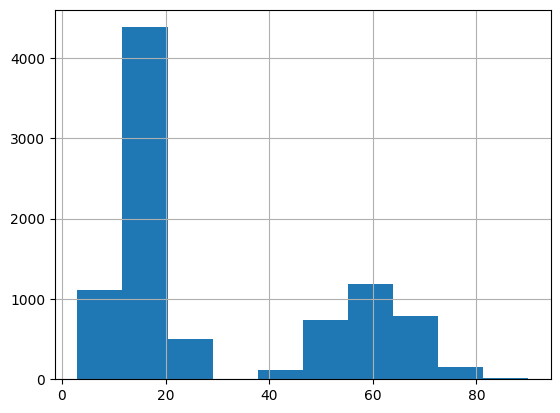

In [15]:
breaks = np.concatenate((long_breaks, short_breaks))
# put the two arrays together to get our "population" of 9000 people

pd.Series(breaks).hist()

In [16]:
breaks.mean()
# 29.99 minutes is our parameter.

29.999444444444446

In [17]:
sample_breaks = np.random.choice(a = breaks, size=100)
# taking a sample of 100 employees

breaks.mean() - sample_breaks.mean()
# difference between means is 0.699 minutes, not bad!



0.6994444444444454

<Axes: >

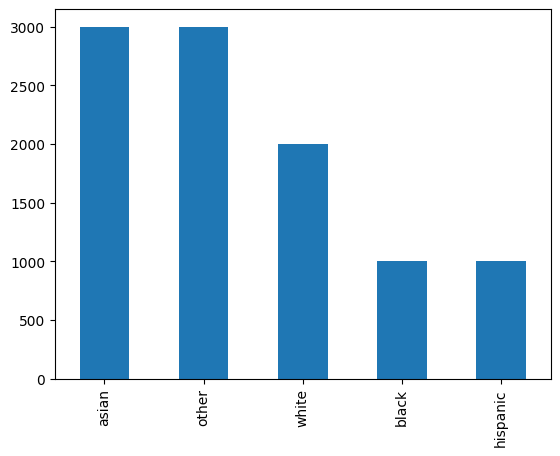

In [22]:
employee_races = (["white"]*2000) + (["black"]*1000) +\
(["hispanic"]*1000) + (["asian"]*3000) +\
(["other"]*3000)

pd.Series(employee_races).value_counts().plot.bar()

In [25]:
import random
demo_sample = random.sample(employee_races, 1000) # Sample 1000 value
for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000. )

white proportion estimate:
0.165
black proportion estimate:
0.102
hispanic proportion estimate:
0.103
other proportion estimate:
0.324
asian proportion estimate:
0.306


array([[<Axes: title={'center': '0'}>]], dtype=object)

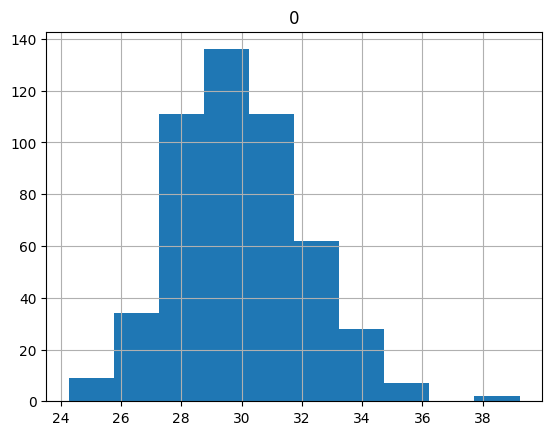

In [27]:
point_estimates = []
for x in range(500): # Generate 500 samples
    # take a sample of 100 points
    sample = np.random.choice(a=breaks, size=100)
    # add the sample mean to our list of point estimates
    point_estimates.append( sample.mean() )
    # look at the distribution of our sample means
pd.DataFrame(point_estimates).hist()

In [29]:
breaks.mean() - np.array(point_estimates).mean()
# .042 minutes difference

0.042324444444446385

In [43]:
import math
sample_size = 100
# the size of the sample we wish to take
sample = np.random.choice(a= breaks, size = sample_size)

sample_mean = sample.mean()
# the sample mean of the break lengths sample
sample_stdev = sample.std()
# sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)
# population standard deviation estimate

stats.t.interval(
    confidence = 0.95, # Confidence level 95%
    df = sample_size - 1, # Degrees of freedom
    loc = sample_mean, # Sample mean
    scale = sigma
) # Standard deviation
# (24.28, 33.14)

(24.280589962639404, 33.1394100373606)

In [44]:
# function to make confidence interval
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)
    sample_mean = sample.mean()  # sample mean
    sample_stdev = sample.std()
    # sample standard deviation
    sigma = sample_stdev/math.sqrt(sample_size)
    # population Standard deviation estimate
    return stats.t.interval(confidence = 0.95, df= sample_size - 1, loc =
    sample_mean, scale = sigma)

In [48]:
breaks_mean = breaks.mean()
times_in_interval = 0
n = 10_000
for i in range(n):
    interval = makeConfidenceInterval()
    if breaks_mean >= interval[0] and breaks_mean <= interval[1]:  # if 29.99 falls in the interval
        times_in_interval += 1
print(times_in_interval / n)
# 0.946

0.9498


In [52]:
for confidence in (.5, .8, .85, .9, .95, .99):
    confidence_interval = stats.t.interval(confidence = confidence, df= sample_size - 1, loc = sample_mean, scale = sigma)
    length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)
    
    print( "confidence {0} has a interval of size {1}".format(confidence, length_of_interval))

confidence 0.5 has a interval of size 3.02
confidence 0.8 has a interval of size 5.76
confidence 0.85 has a interval of size 6.48
confidence 0.9 has a interval of size 7.41
confidence 0.95 has a interval of size 8.86
confidence 0.99 has a interval of size 11.73


In [54]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55,
size=100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15,
size=300)
engineering_breaks = np.concatenate((long_breaks_in_engineering,
short_breaks_in_engineering))
print(breaks.mean())
# 29.99
print(engineering_breaks.mean())
# 34.825

29.999444444444446
35.115


In [57]:
t_statistic, p_value = stats.ttest_1samp(a = engineering_breaks, popmean= breaks.mean())

In [58]:
t_statistic, p_value

(5.708851427803847, 2.2230407625077293e-08)

In [59]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]

chi_squared, p_value = stats.chisquare(f_obs= observed, f_exp=
expected)
chi_squared, p_value
#(30.1817679275599, 1.26374310311106e-06)

(30.1817679275599, 1.26374310311106e-06)

In [61]:
observed = np.array([[134, 54],[110, 48]])
# built a 2x2 matrix as seen in the table above
chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed= observed)
chi_squared, p_value
# (0.04762692369491045, 0.82724528704422262)

(0.04762692369491045, 0.8272452870442226)